In [91]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (10,5)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [92]:
df = pd.read_csv("Train_Dataset.csv")
df

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn,Unnamed: 20
0,1001,15.0,452,no,no,0.0,121.1,130.0,20.59,216.0,...,18.36,235.1,33.0,10.58,16.1,5.0,4.35,2.0,No,NaN
1,1002,105.0,452,no,no,0.0,259.3,96.0,44.08,175.2,...,14.89,222.4,36.0,10.01,12.0,5.0,3.24,3.0,No,NaN
2,1003,97.0,452,no,yes,32.0,183.4,94.0,31.18,269.1,...,22.87,203.5,38.0,9.16,6.7,4.0,1.81,5.0,No,NaN
3,1004,121.0,445,no,yes,35.0,68.7,95.0,11.68,209.2,...,17.78,197.4,42.0,8.88,11.4,4.0,3.08,1.0,No,NaN
4,1005,98.0,452,no,yes,22.0,278.3,89.0,47.31,93.4,...,7.94,107.6,42.0,4.84,9.7,5.0,2.62,0.0,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,3317,109.0,452,no,no,0.0,180.0,100.0,30.60,229.0,...,19.47,139.4,105.0,6.27,7.8,8.0,2.11,3.0,No,NaN
2317,3318,185.0,452,yes,yes,30.0,154.1,114.0,26.20,118.7,...,10.09,258.4,105.0,11.63,12.9,3.0,3.48,2.0,No,NaN
2318,3319,55.0,452,yes,no,0.0,188.9,88.0,34.62,270.1,...,22.77,209.7,105.0,9.17,14.3,5.0,3.86,1.0,Yes,NaN
2319,3320,138.0,547,yes,no,0.0,191.2,130.0,32.35,164.5,...,14.00,241.4,105.0,10.46,15.2,1.0,4.10,0.0,Yes,NaN


In [93]:
df['Churn'] = df['Churn'] == 'Yes' 
df['intertiol_plan'] = df['intertiol_plan'] == 'yes'
df['voice_mail_plan'] = df['voice_mail_plan'] == 'yes'
df

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn,Unnamed: 20
0,1001,15.0,452,False,False,0.0,121.1,130.0,20.59,216.0,...,18.36,235.1,33.0,10.58,16.1,5.0,4.35,2.0,False,NaN
1,1002,105.0,452,False,False,0.0,259.3,96.0,44.08,175.2,...,14.89,222.4,36.0,10.01,12.0,5.0,3.24,3.0,False,NaN
2,1003,97.0,452,False,True,32.0,183.4,94.0,31.18,269.1,...,22.87,203.5,38.0,9.16,6.7,4.0,1.81,5.0,False,NaN
3,1004,121.0,445,False,True,35.0,68.7,95.0,11.68,209.2,...,17.78,197.4,42.0,8.88,11.4,4.0,3.08,1.0,False,NaN
4,1005,98.0,452,False,True,22.0,278.3,89.0,47.31,93.4,...,7.94,107.6,42.0,4.84,9.7,5.0,2.62,0.0,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,3317,109.0,452,False,False,0.0,180.0,100.0,30.60,229.0,...,19.47,139.4,105.0,6.27,7.8,8.0,2.11,3.0,False,NaN
2317,3318,185.0,452,True,True,30.0,154.1,114.0,26.20,118.7,...,10.09,258.4,105.0,11.63,12.9,3.0,3.48,2.0,False,NaN
2318,3319,55.0,452,True,False,0.0,188.9,88.0,34.62,270.1,...,22.77,209.7,105.0,9.17,14.3,5.0,3.86,1.0,True,NaN
2319,3320,138.0,547,True,False,0.0,191.2,130.0,32.35,164.5,...,14.00,241.4,105.0,10.46,15.2,1.0,4.10,0.0,True,NaN


## Data visualization

Text(0.5, 1.0, 'voice_mail_plan')

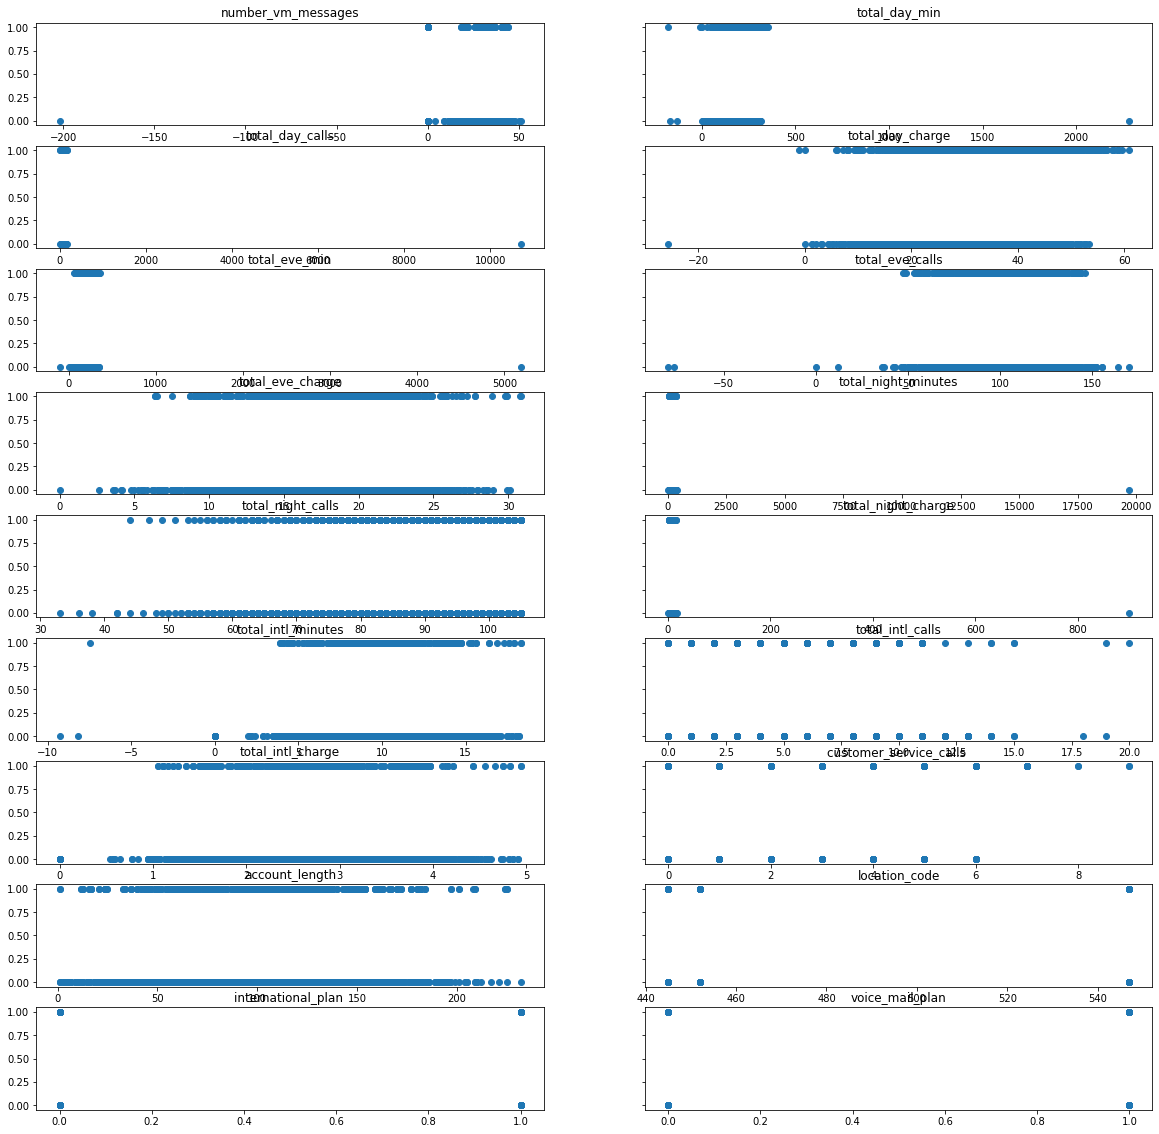

In [94]:
fig, ax  = plt.subplots(9,2,figsize = (20,20),sharey=True)

ax[0][0].scatter(df9['number_vm_messages'],df9['Churn'])
ax[0][0].set_title("number_vm_messages")

ax[0][1].scatter(df9['total_day_min'],df9['Churn'])
ax[0][1].set_title("total_day_min")

ax[1][0].scatter(df9['total_day_calls'],df9['Churn'])
ax[1][0].set_title("total_day_calls")

ax[1][1].scatter(df9['total_day_charge'],df9['Churn'])
ax[1][1].set_title("total_day_charge")

ax[2][0].scatter(df9['total_eve_min'],df9['Churn'])
ax[2][0].set_title("total_eve_min")

ax[2][1].scatter(df9['total_eve_calls'],df9['Churn'])
ax[2][1].set_title("total_eve_calls")

ax[3][0].scatter(df9['total_eve_charge'],df9['Churn'])
ax[3][0].set_title("total_eve_charge")

ax[3][1].scatter(df['total_night_minutes'],df['Churn'])
ax[3][1].set_title("total_night_minutes")

ax[4][0].scatter(df['total_night_calls'],df['Churn'])
ax[4][0].set_title("total_night_calls")

ax[4][1].scatter(df['total_night_charge'],df['Churn'])
ax[4][1].set_title("total_night_charge")

ax[5][0].scatter(df['total_intl_minutes'],df['Churn'])
ax[5][0].set_title("total_intl_minutes")

ax[5][1].scatter(df['total_intl_calls'],df['Churn'])
ax[5][1].set_title("total_intl_calls")

ax[6][0].scatter(df['total_intl_charge'],df['Churn'])
ax[6][0].set_title("total_intl_charge")

ax[6][1].scatter(df['customer_service_calls'],df['Churn'])
ax[6][1].set_title("customer_service_calls ")

ax[7][0].scatter(df['account_length'],df['Churn'])
ax[7][0].set_title("account_length")

ax[7][1].scatter(df['location_code'],df['Churn'])
ax[7][1].set_title("location_code")

ax[8][0].scatter(df['intertiol_plan'],df['Churn'])
ax[8][0].set_title("international_plan ")

ax[8][1].scatter(df['voice_mail_plan'],df['Churn'])
ax[8][1].set_title("voice_mail_plan")




There are some features with negetive values for call minutes. These are clearly outliers

## Outlier Removal

### vm_messages

In [95]:
df.number_vm_messages.describe()

count    2318.000000
mean        7.557377
std        14.250001
min      -202.000000
25%         0.000000
50%         0.000000
75%        14.000000
max        51.000000
Name: number_vm_messages, dtype: float64

In [96]:
df.number_vm_messages.unique()

array([   0.,   32.,   35.,   22.,   17.,   42.,   31.,   30.,   28.,
         29.,   25.,   33.,   41.,   23.,   46.,   38.,   34.,   36.,
         19.,   27.,   24.,   39.,    9.,   45.,   nan,   40.,   13.,
         18.,   37.,   26.,   21.,   14.,   20.,   44.,   43.,   12.,
         16.,   15.,   51.,    4.,   48.,   11., -202.,   47.,   50.])

In [97]:
df.shape

(2321, 21)

In [98]:
df1= df[df.number_vm_messages>=0]
df1.number_vm_messages.unique()

array([ 0., 32., 35., 22., 17., 42., 31., 30., 28., 29., 25., 33., 41.,
       23., 46., 38., 34., 36., 19., 27., 24., 39.,  9., 45., 40., 13.,
       18., 37., 26., 21., 14., 20., 44., 43., 12., 16., 15., 51.,  4.,
       48., 11., 47., 50.])

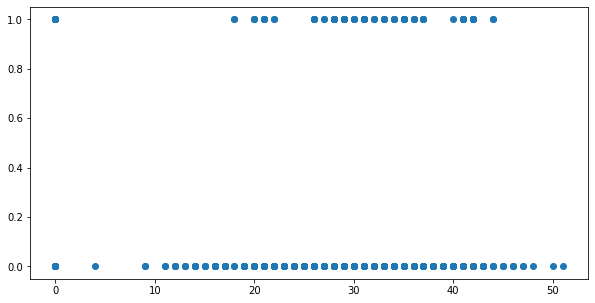

In [99]:
plt.scatter(df1['number_vm_messages'],df1['Churn'])

In [100]:
df1.shape

(2317, 21)

### total day min

In [101]:
df1.total_day_min .unique()

array([121.1, 259.3, 183.4, ..., 102. , 272.1, 191.2])

In [102]:
df2= df1[df1.total_day_min<500]
df2= df2[df2.total_day_min>=0]
df2.total_day_min.unique()

array([121.1, 259.3, 183.4, ..., 102. , 272.1, 191.2])

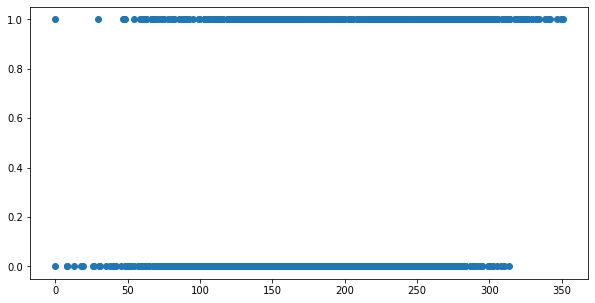

In [103]:
plt.scatter(df2['total_day_min'],df2['Churn'])

### total day calls

In [104]:
df3= df2[df2.total_day_calls<500]
df3.total_day_min.unique()

array([121.1, 259.3, 183.4, ..., 102. , 272.1, 191.2])

In [105]:
df3.total_day_calls.describe()

count    2307.000000
mean      100.827048
std        20.379721
min         0.000000
25%        87.000000
50%       102.000000
75%       115.000000
max       165.000000
Name: total_day_calls, dtype: float64

### total day charge

In [106]:
df4= df3[df3.total_day_charge>0]
df4.total_day_charge.unique()

array([20.59, 44.08, 31.18, ..., 17.34, 46.26, 34.62])

In [108]:
df4.total_day_charge.describe()

count    2300.000000
mean       31.016913
std         9.713589
min         1.330000
25%        24.495000
50%        30.625000
75%        37.592500
max        60.960000
Name: total_day_charge, dtype: float64

### total eve mins

In [115]:
df5= df4[df4.total_eve_min<500]
df5= df5[df5.total_eve_min>=0]
df5.total_eve_min.unique()

array([216. , 175.2, 269.1, ..., 154. , 229. , 270.1])

In [116]:
df5.total_eve_min.describe()

count    2295.000000
mean      201.506754
std        50.963315
min         0.000000
25%       165.950000
50%       202.400000
75%       236.400000
max       358.500000
Name: total_eve_min, dtype: float64

### total eve calls

In [118]:
df6= df5[df5.total_eve_calls>=0]
df6.total_eve_calls.describe()

count    2290.000000
mean      100.208734
std        19.841423
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       170.000000
Name: total_eve_calls, dtype: float64

### total night mins

In [120]:
df7= df6[df6.total_night_minutes<500]
df7.total_night_minutes.describe()

count    2288.000000
mean      201.191827
std        50.661764
min        23.200000
25%       167.500000
50%       201.100000
75%       235.225000
max       395.000000
Name: total_night_minutes, dtype: float64

### total night charge

In [121]:
df8= df7[df7.total_night_charge<200]
df8.total_night_charge.describe()

count    2285.000000
mean        9.054818
std         2.278884
min         1.040000
25%         7.540000
50%         9.050000
75%        10.590000
max        17.770000
Name: total_night_charge, dtype: float64

### total intl mins

In [122]:
df9 = df8[df8.total_intl_minutes>=0]
df9.total_intl_minutes.describe()

count    2282.000000
mean       10.273094
std         2.711733
min         0.000000
25%         8.600000
50%        10.300000
75%        12.000000
max        18.300000
Name: total_intl_minutes, dtype: float64

## Visualization after removing outliers

Text(0.5, 1.0, 'voice_mail_plan')

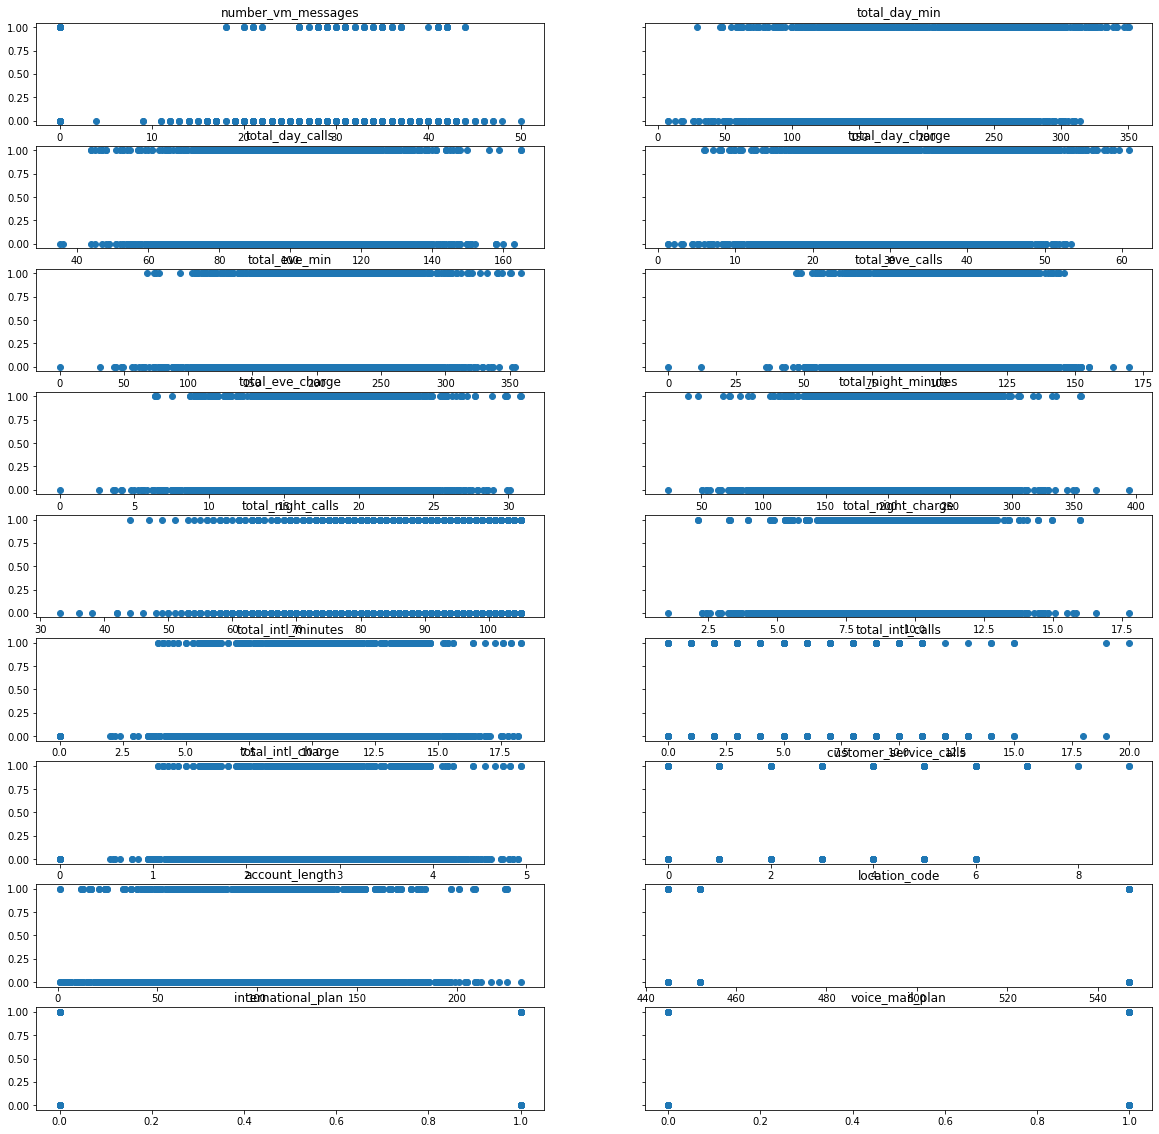

In [123]:
fig, ax  = plt.subplots(9,2,figsize = (20,20),sharey=True)

ax[0][0].scatter(df9['number_vm_messages'],df9['Churn'])
ax[0][0].set_title("number_vm_messages")

ax[0][1].scatter(df9['total_day_min'],df9['Churn'])
ax[0][1].set_title("total_day_min")

ax[1][0].scatter(df9['total_day_calls'],df9['Churn'])
ax[1][0].set_title("total_day_calls")

ax[1][1].scatter(df9['total_day_charge'],df9['Churn'])
ax[1][1].set_title("total_day_charge")

ax[2][0].scatter(df9['total_eve_min'],df9['Churn'])
ax[2][0].set_title("total_eve_min")

ax[2][1].scatter(df9['total_eve_calls'],df9['Churn'])
ax[2][1].set_title("total_eve_calls")

ax[3][0].scatter(df9['total_eve_charge'],df9['Churn'])
ax[3][0].set_title("total_eve_charge")

ax[3][1].scatter(df9['total_night_minutes'],df9['Churn'])
ax[3][1].set_title("total_night_minutes")

ax[4][0].scatter(df9['total_night_calls'],df9['Churn'])
ax[4][0].set_title("total_night_calls")

ax[4][1].scatter(df9['total_night_charge'],df9['Churn'])
ax[4][1].set_title("total_night_charge")

ax[5][0].scatter(df9['total_intl_minutes'],df9['Churn'])
ax[5][0].set_title("total_intl_minutes")

ax[5][1].scatter(df['total_intl_calls'],df['Churn'])
ax[5][1].set_title("total_intl_calls")

ax[6][0].scatter(df9['total_intl_charge'],df9['Churn'])
ax[6][0].set_title("total_intl_charge")

ax[6][1].scatter(df9['customer_service_calls'],df9['Churn'])
ax[6][1].set_title("customer_service_calls ")

ax[7][0].scatter(df9['account_length'],df9['Churn'])
ax[7][0].set_title("account_length")

ax[7][1].scatter(df9['location_code'],df9['Churn'])
ax[7][1].set_title("location_code")

ax[8][0].scatter(df9['intertiol_plan'],df9['Churn'])
ax[8][0].set_title("international_plan ")

ax[8][1].scatter(df9['voice_mail_plan'],df9['Churn'])
ax[8][1].set_title("voice_mail_plan")